# StrathDATeam
**Team Members**


1. Aitzol Larrabe (202083285)
2. Andrea Oteo (202059017)
3. Ane Etxeandia (202077594)
4. Caelan Dwyer (202065079)
5. Crawford Middleton (202082754)



# Regression Problem


## Data exploration and preparation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving CS98XClassificationTest.csv to CS98XClassificationTest.csv
Saving CS98XClassificationTrain.csv to CS98XClassificationTrain.csv
User uploaded file "CS98XClassificationTest.csv" with length 8573 bytes
User uploaded file "CS98XClassificationTrain.csv" with length 39142 bytes


First of all, the regression files have been loaded, both the train and the test.

The pandas package has been used to read the test and train files in order to manipulate the data in them. On the other hand, the Scikit-learn library has also been used to carry out the Random Forest, Grid Search, Decision Tree, Voting and Bagging models. The matploit library has also been used to reproduce different graphs when analysing the data.

In [ ]:
regre_train = pd.read_csv("CS98XRegressionTrain.csv")
regre_test = pd.read_csv("CS98XRegressionTest.csv")

It has been analyzed, if there is any data that is blank or null.

In [ ]:
regre_train.isnull().sum()

As there are very few NaN lines comparing to the total ones, we have decided to drop them.

In [ ]:
regre_train = regre_train.dropna()

In [ ]:
regre_train['top genre'].unique()
regre_train['top genre'].nunique()
regre_train['top genre'].value_counts()[:10].sort_values(ascending=False)

There are 86 unique genres of music in this dataset. The top 10 most popular genres are: adult standards 68, album rock 66, dance pop 61, the rest are represented in less than 16 cases.

At this point, it has been decided to apply One-hot encoding technique in order not to loose the genre category and use it in the analysis. We know that as we have a separate training and test set, we have to be aware that if there are different categories in the test and training set, then the 2 datasets won't correspond with each other. But in this case, the categories that we are keeping (the 3 most repeated) appear in both of the datasets.


In [ ]:
regre_train['general_genre'] = 'other'
regre_train.loc[regre_train['top genre'].str.contains("adult standards", na=False),['general_genre']] = 'adult standards'
regre_train.loc[regre_train['top genre'].str.contains("album rock", na=False),['general_genre']] = 'album rock'
regre_train.loc[regre_train['top genre'].str.contains("dance pop", na=False),['general_genre']] = 'dance pop'
regre_train = pd.get_dummies(data = regre_train, columns=['general_genre'])

In [ ]:
regre_test['general_genre'] = 'other'
regre_test.loc[regre_test['top genre'].str.contains("adult standards", na=False),['general_genre']] = 'adult standards'
regre_test.loc[regre_test['top genre'].str.contains("album rock", na=False),['general_genre']] = 'album rock'
regre_test.loc[regre_test['top genre'].str.contains("dance pop", na=False),['general_genre']] = 'dance pop'
regre_test = pd.get_dummies(data = regre_test, columns=['general_genre'])

In the case of songs title and artists, as none of them have a value that is repeated several times, it has been decided to eliminate them.

In [ ]:
regre_train = regre_train.drop(['Id','title','top genre','artist'],axis = 1)

In [ ]:
index = regre_test['Id']

In [ ]:
regre_test = regre_test.drop(['Id','title','top genre','artist'],axis = 1)

As we have already the data separated in train and test it is not neccessary to do the stratified sampling.

We can then plot the distributions of the training and test sets to check that they look similar.

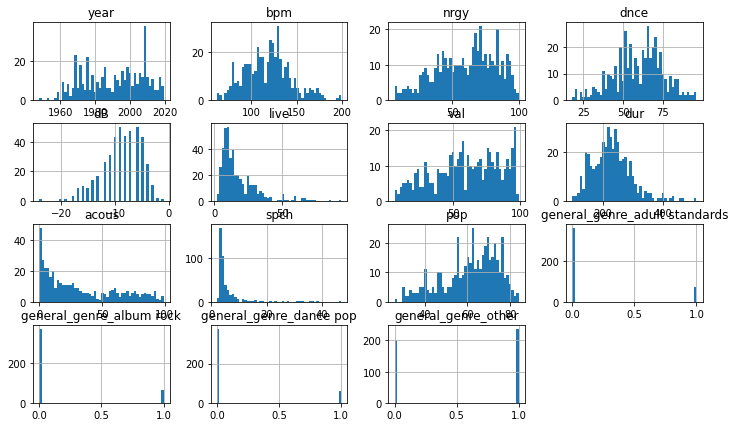

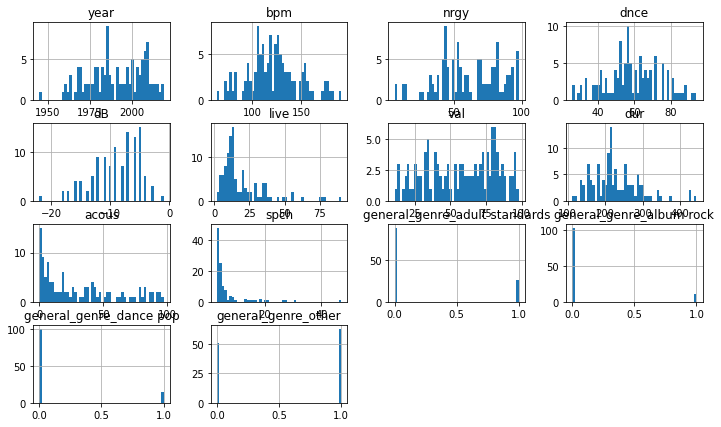

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
regre_train.hist(bins=50, figsize=(12,7))
regre_test.hist(bins=50, figsize=(12,7))
plt.show()

The data have been separated into explanatory variables (X) and target (y).

In [ ]:
X = regre_train.drop("pop", axis=1) 
y = regre_train["pop"].copy()

In [ ]:
num_attribs = list(X)

In [ ]:
num_attribs1 = list(regre_test)

Machine learning algorithms may perform best when features are on a relatively similar scale and close to the normal distribution. StandardScaler has been applied, which standardizes a feature by subtracting the mean and then scaling to the unit variance. The unit variance means dividing all values by the standard deviation. It results in a distribution with a standard deviation equal to 1 and makes the mean of the distribution 0. 

Both the train and the test have been scaled up.

In [ ]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
X[num_attribs] = std_scaler.fit_transform(X[num_attribs])

X.head(10)

In [ ]:
std_scaler1 = preprocessing.StandardScaler()
regre_test[num_attribs1] = std_scaler1.fit_transform(regre_test[num_attribs1])

regre_test.head(10)

Train_test_split, which is a function in Sklearn model selection, has been applied to split the data matrices into two subsets: for the training data and for the test data. The split used for train_size and test_size has been 75-25.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

## Solution: Random Forest model
The model that best performs in this case is Random Forest. We chose this type of algorithm because it is a set of Decision Trees that provides extra randomness. After all, Decision Trees are very powerful algorithms that are capable of fitting complex datasets, and here we are combining 100 different Decision Trees and we achieve a higher bias for a lower variance that yields in an overall better model.

### Random Forest algorithm
The explanation of why we have chosen these parameters and what is involved in increasing or decreasing them is explained below:

*   **n_estimators:** The number of trees in the forest. Choosing a huge number of estimators does not degrade the model, but it increases the computational complexity. In addition, above a certain number of trees the performance of the model stagnates. In this case it stagnates at 100.
*   **max_leaf_nodes:** Sets a condition on the splitting of the nodes in the tree and therefore restricts the growth of the tree. It has been proven that if the value of this hyperparameter is very small it tends to underfitting the data and, if the values increases, the performance is better. However, in order not to overfit the data the maximum value of the parameter is set in 25.
*   **oob_score:** A way of validating the model using out-of-bag samples to estimate the R^2 on unseen data. As our dataset is not big enough and hence set aside a part of it for validation is unaffordable, in this case we chose "False".
*   **warm_start:** The real power of out-of-bag cross-validation comes when combining it with a warm start. But, as in this particular case we are not using oob cross-validation, warm_start is "False" as well. 
*   **bootstrap:** We are doing the ensemble learning method with Bagging as we choose "True" in this hyperparameter. That is to say, sampling is performed with replacement. 






In [ ]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False)
rnd_reg.fit(X, y)
y_test_pred6 = rnd_reg.predict(regre_test)

In [ ]:
from sklearn import metrics
rnd_reg.fit(X_train, y_train)
y_test_pred6rmse = rnd_reg.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred6rmse)))

Root Mean Squared Error: 9.623282278837186


The way to export the file in the required format for uploading it to Kaggle is as follows:

In [ ]:
from google.colab import files
voting_pred=pd.DataFrame({'Id':index,'pop':y_test_pred6})
voting_pred.to_csv('rdmforest_pred.csv', index = False)
files.download("rdmforest_pred.csv")

### Grid Search
Instead of choosing the different combinations of hyperparameters manually, we use Grid Search object to search for us (always having into account the limitations explained above). We insert some hyperparameters that thought will be relevant and it worked pretty well. The score with the hyperparameters recommended by Grid Search is much better than choosing them manually.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor()
params = {
    'n_estimators' : [75, 100, 150],
    'max_leaf_nodes': [10, 20, 25],
    'bootstrap' : [False, True],
    'warm_start': [False, True],
    'oob_score' : [False, True]
}
grid_search = GridSearchCV(estimator = rnd_reg,
                        param_grid = params, 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)
grid_search.fit(X, y)

## Other models tried
Apart from the Random Forest, three other regression methods have been tried. On the one hand, a Decision Tree algorithm has been attempted as it is a powerful algorithm for solving regression problems and is capable of adapting to complex datasets. 

On the other hand, two ensembled methods have been explored. This type of methods aggregate the predictions of several predictors rather than relying on the result of one of them. From the literature we conclude that in most cases, the aggregated predictions result in better predictions than the best single predictor's ones. 

The performance level depends very much on the dataset, so no model is a priori guaranteed to work better. The only way to know which model is best is to evaluate them all. Error rates are similar, but ensemble models are likely to generalise better.  

####Decision Tree Regression 
Decision Trees are one type of regression algorithm which predict a value in each node of the tree. The predicted value for each node is the average target value of the instances in that node. The algorithm splits each node in a way that makes most training instances as close as possible to the predicted value. This algorithm tends to overfitting when dealing with regression tasks if no restrictive parameter such as max_depth is used. In this case we set this parameter to 3 which means the number of levels the tree is divided into. This type of algorithm can adapt to complex datasets.



In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, y)
y_test_pred3 = tree_reg.predict(regre_test)

In [ ]:
tree_reg.fit(X_train, y_train)
y_test_pred3rmse = tree_reg.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred3rmse)))

Root Mean Squared Error: 10.19445480847442


####Voting Classifiers
This ensembled algorithm, aggregates the predictions of the Linear Support Vector Machine, Polynomial Support Vector Machine and Regression Tree algorithms, and then selects the most voted predictions.
SVM algorithms try to include as many instances as possible in the so-called street space around the regression line. According to the literature, SVM algorithms are not very popular for solving regression problems, but ensembled methods are able to create strong predictors by aggregating results of several soft predictors.
For that reason it was expected that the aggregation of the predictions of the SVM algorithms would improve the results obtained by Decision Tree Regression alone. And so it did, as the RMSE value has dropped from 10.19 to 10.07.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

#SVM Linear
svm_reg = LinearSVR(epsilon=8, random_state=42) 
svm_reg.fit(X, y)

#SVM Polynomial
svm_poly_reg = SVR(kernel='poly',degree=2,C=0.1, epsilon=0.1)
svm_poly_reg.fit(X,y)

voting_regressor = VotingRegressor(estimators=[('svm', svm_reg), ('svmn', svm_poly_reg), ('tree', tree_reg)])
voting_regressor.fit(X, y)
y_test_pred4 = voting_regressor.predict(regre_test)

In [ ]:
voting_regressor.fit(X_train, y_train)
y_test_pred4rmse = voting_regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred4rmse)))

Root Mean Squared Error: 10.070678533127074


###Bagging
Next, another type of ensembled method was tried which instead of aggregating predictions from different algorithms, uses the same training algorithm for all predictors, but training them on different random subsets of the training set. This algorithm allows training instances to be sampled several times across multiple predictors.  Each predictor has a higher bias than if it was trained on the original training set, but the aggregation reduces the bias and the variance. According to the literature, the ensemble result generally has a similar bias but lower variance than a single predictor trained on the original training set. Another advantage of this method is that it has a high scalability. The RMSE value has turned out to be even lower than the one from the previous ensembled method.

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_reg = BaggingRegressor(
    DecisionTreeRegressor(random_state=42), n_estimators=25,
    max_samples=50, bootstrap=True, n_jobs=-1, random_state=42)

bag_reg.fit(X, y)
y_test_pred5 = bag_reg.predict(regre_test)

In [ ]:
bag_reg.fit(X_train, y_train)
y_test_pred5rmse = bag_reg.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred5rmse)))

Root Mean Squared Error: 9.897572888890947


## Performance obtained in Kaggle

After testing the different methods performed in Kaggle, we obtained the best results with the ones explained above. Among them, the one that gave us the best result was the Random Forest method. The best score obtained in Kaggle was 7.84683 RMSE, after adding parameters to this method and improving the final result. To achieve the parameters that gave us the best result we used search grid, so we set for example n_estimators=100, min_samples_split=2, oob_score=false or max_features=auto. Our position in the competition can be considered good, as we are not far from the first place, which has a score of 7.31169 RMSE. 

In contrast, the RMSE obtained in Google Colab was 9.62, this is a little bit higher error than the one obtained in Kaggle. The error obtained in the test is lower, so the model generalises very well. The train and validation RMSE is very similar and, as the error is not very high, we can conclude that the performance of the developed model can be taken as adequate.


# Classification Problem

## Data exploration and preparation

In [ ]:
class_train = pd.read_csv("CS98XClassificationTrain.csv")
class_test = pd.read_csv("CS98XClassificationTest.csv")

Missing Values

In [ ]:
class_train["top genre"].isnull().value_counts()

There are 15 null values in the column "top genre". This is quite insignificant compared to the rest of the dataset so these values can be removed.

In [ ]:
# dropping NULL values
class_train = class_train.dropna(axis=0)

There are no more null values... Data types: title, artist, and top genre columns contain objects, all others contain integers. There are 15 columns/features in the class_train dataset. 

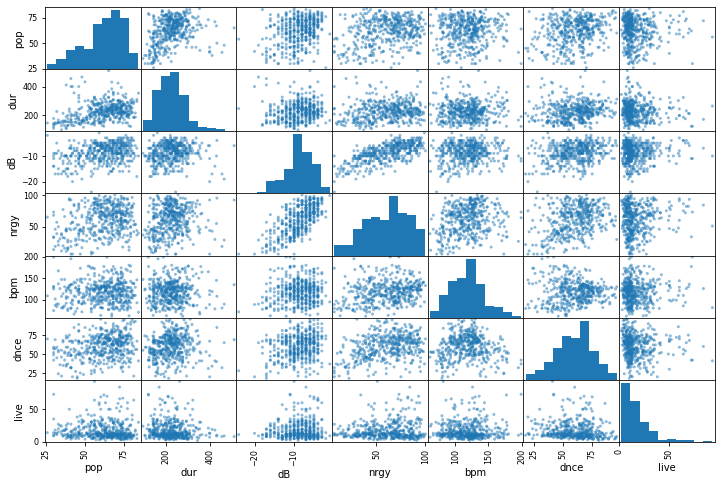

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["pop", "dur","dB","nrgy", "bpm", "dnce", "live"]
scatter_matrix(class_train[attributes], figsize=(12,8))
plt.show()

In the scatter graph, it shows the data is very linear.

### Checking for multicollinearity between features

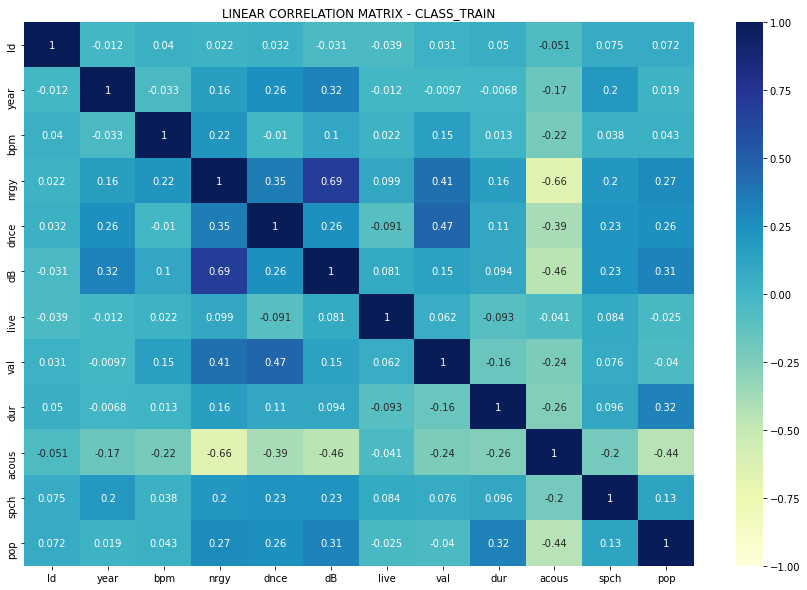

In [ ]:
# Plot linear correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(class_train.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('LINEAR CORRELATION MATRIX - CLASS_TRAIN')
plt.show()

It can be shown from the linear correlation matrix that it appears there is no multicollinearity between the features. This indicates we can use linear models for our analysis. 

## Data Visualisation 

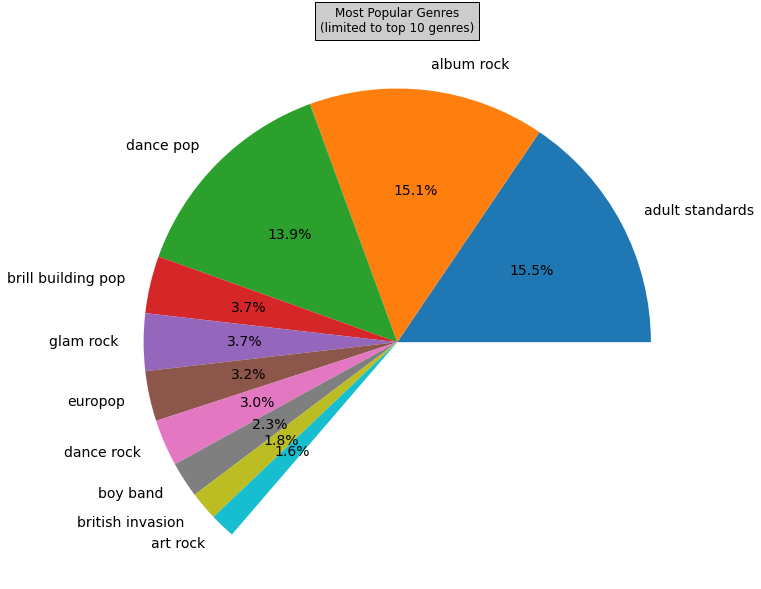

In [ ]:
# Find percent of each genre
df_genre = class_train['top genre'].value_counts()[:10].sort_values(ascending=False) / len(class_train)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()

# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
plt.title("Most Popular Genres\n" + "(limited to top 10 genres)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

The pie plot was limited to the top 10 genres to maintain a readable aesthetic.

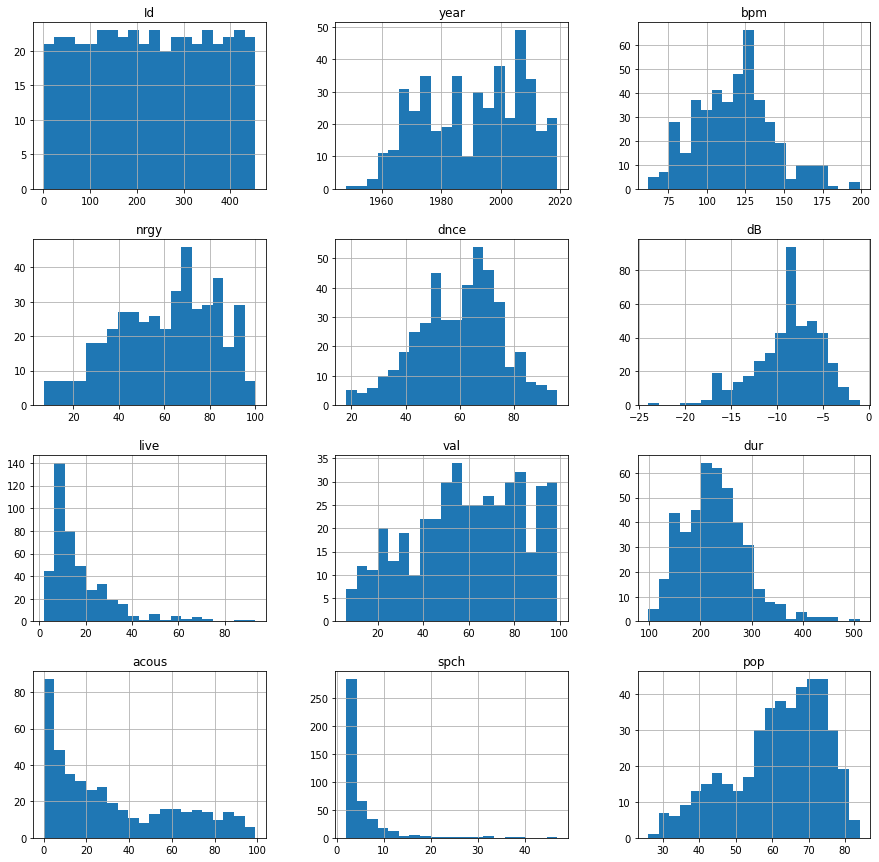

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
class_train.hist(bins=20, figsize=(15,15))
plt.show()

The features which illustrate obvious skewness are acous, spch, dur and live. These features were treated for outliers later on to try and limit overfitting.

## Preparation of the Data

The number of attributes in the 'top genre' column was reduced from 86 to 20 to generalise the model.

In [ ]:
class_train = class_train.replace({'top genre': {"album rock": "rock", "glam rock": "rock", "dance rock":"rock", "art rock":"rock",
                                  "soft rock":"rock", "country rock": "rock", "classic rock":"rock", "blues rock":"rock", "celtic rock":"rock",
                                  "australian rock":"rock", "german alternative rock":"rock", "alternative rock":"rock", "dance pop":"pop",
                                "brill building pop": "pop", "europop": "pop", "barbadian pop": "pop", "classic uk pop":"pop", 
                                "new wave pop":"pop", "canadian pop":"pop", "art pop":"pop", "belgian pop": "pop", "britpop": "pop", 
                                "italian pop":"pop", "classic danish pop": "pop", "bow pop": "pop", "baroque pop": "pop", "bubblegum pop": "pop",
                                "afropop":"pop", "hip pop":"pop", "atl hip hop": "hip hop", "east coast hip hop": "hip hop", "detroit hip hop":"hip hop", 
                                "bronx hip hop": "hip hop", "bubblegum dance": "dance", "eurodance":"dance", "belgian dance":"dance", "german dance": "dance",
                                "classic soul": "soul", "british soul": "soul", "chicago soul": "soul", "british folk": "folk", "american folk revival":"folk",
                                "drone folk":"folk","canadian folk":"folk", "deep adult standards":"adult standards", "glam metal": "metal", "alternative metal": "metal",
                                "acoustic blues":"blues", "british blues":"blues", "louisiana blues":"blues", "g funk":"funk", "brit funk":"funk",
                                "afrobeat":"dance", "british invasion":"rock", "doo-wop":"blues", "boy band":"pop", "merseybeat":"rock-and-roll", "blue":"blues",
                                                "bebop":"jazz", "avant-garde jazz":"jazz", "boogaloo": "latin", "big room": "trance", "bubble trance":"trance", "glam punk":"rock",
                                                "australian talent show":"pop", "mellow gold":"rock", "hi-nrg": "dance", "neo mellow": "pop", "yodeling":"folk", "classic girl group":"pop",
                                                "british dance band":"jazz", "deep house":"dance", "uk garage": "dance", "chicago rap":"hip hop"}})


The features that were dropped are Title, Artist and Id. The training set was then seperated using the train_test_split function to further partition the data into a 75% / 25% split. The features selected for the model training were:'year', 'bpm', 'nrgy', 'dnce', 'dB', 'spch', 'pop', 'live', 'acous'.

In [ ]:
y = class_train.values[:,14]
X = class_train.values[:,3:13]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Solution: Ensemble Learning - Voting Classifier
The best 3 models were selected to use for emsemble learning. A hard voting classifier was the best option for the data as we wanted to achieve high accuracy.  The models selected for ensemble learning were random forest, logistic regression and linear support vector machine as these techniques are  independent from each other. independence within the ensemble method will increase the chance the algorithm will make different types of errors and improve the accuracy. The final model is selected by voting on the best majority predictions from the 3 models.  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier


log_clf = OneVsRestClassifier(LogisticRegression(max_iter=10000, penalty = "l2", C=1, random_state=1))
rnd_clf = RandomForestClassifier(random_state=1, n_estimators=75)
svm_clf = OneVsRestClassifier(LinearSVC(C=0.01, loss = "hinge", random_state = 1, max_iter=10000))
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, ypred))

**Random Forest Accuracy Score**: 0.464

**Logistic Regression Accuracy Score**: 0.5

**LinearSVC Accuracy Score**: 0.318

**Voting Classifier Accuracy Score**: 0.5

The Logistic Regression and Voting Classifier had the same score. The Voting Classifier was selected as it is more robust as it reduces the spread of the predictions and model performance.

## Other models tried
The models below were used for our ensemble learning approach. It can be shown in the results from our final solution the voting classifer was the best model. 

**Grid Search**

Hyperparameters are not optimised by the learning algorithm, therefore when there is a limited amount of data (not enought to create a validations set) the hyperparameter tuning method "grid search" can be implemented. When training the SVM there are two hyperparameters to tune the penalty parameter C and the linear kernel. Also when training the Logistic Regression there are two hyperparameters the penalty and value of C, which are used to regularise the logistic regression model

**Support Vector Machine (SVM)**

The suport vector machine algorithm was a good choice for our analysis as the data for the spotify classification is a small (number of instances small) data set and very complex (large number of features), so the support vector machine algorithm is good as it can deal with high bias/low variance. OneVersusRest is a heuristic method that involves splitting the training data into multiple binary classification problems. A binary classifier it trained on each individual binary classification problem and predictions are made upon the model that is most confident. 

Scaling was carried out before building our SVM as they are senstive to feature scales. This was to prevent the widest possible street in our model to be too close to the decision boundary

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('SVC',LinearSVC())])

# Gridsearch to determine the value of C
param_grid = {'SVC__C':np.arange(0.01,100,10)}
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
linearSVC.fit(X_train,y_train)
print(linearSVC.best_params_)

On the first run of the model using the hyperparameter of C=1 the accuracy was very low at 26%. GridSearch was used to reduce  C to 0.01. This will prevent overfitting.

**Logistic Regression**

Logistic Regression is a classification algorithm that can be used in both the case of binary classification and multiclass classification. Due to the data being linearly separable, the logistic regression model was a good choice to make predictions on. The model was an ideal candidate for selection as it has high bias/low variance, which is perfect for the small Spotify dataset.

In [ ]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression(max_iter=10000)
penalty = ['l1', 'l2']

C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Fine-tuning the hyperparameters for logistic regression saw no improvement on the final accuracy

**Random Forest**

Random Forest is one of the most widely used Ensemble learning algorithms. It uses a modified tree learning algorithm to inspect a random subset of the features at each split in the “learning” process. This avoids correlation of trees. Random Forest reduces the variance of the final model, reducing overfitting.
We did try to fine tune the hyperparameters for randon forest, but found as the model is a very good classifer already we didnt see much improvement.

## Performance Obtained in Kaggle

## Addressing Overfitting
The accuracy score was 0.10714 when the selected model was applied to the test data (once submitted to Kaggle), which is significantly low. This is due to overfitting, which means it predicts the labels of the training data well, but makes frequent errors when applied to new data. This means that the model has high variance. 

**Best Score**

The best score achieved was when we removed the generalised labels for the subgroups in 'top genre' and reverted back to the original labels. The outcome seen the accuracy reach 0.30357. The reason for the increase in the accuracy was due to us over- generalising the model by removing the subgroups of genres.

Possible solutions to further reduce  Overfitting were attempted: adding more Data (relabelling the NULL values by using google to identify the song genre), removing Outliers from training data set, , Dimensionality Reduction (PCA technique).
  



**Replacing Null Values**

In order to obtain "more data" we have used spotify/google to determine the correct genres for the songs that had null values.

Outcome: Replacing the null values from google showed no increase in the accuracy on the test data within kaggle, but instead reduce the 0.25.

**Removing Outliers**

The histograms  showing the distributions of the features indicate that some variables are skewed (acous, live, spch). A reason for this skew could be outliers.  By removing outliers the skew could potentially be reduced. Outliers can be identified using Box-plots, and the Z-score.Any Z-score greater than 3 or less than -3 is considered to be an outlier.



Outcome: Removing the outliers, and reducing noise, did not improve the overfitting (accuracy score on Kaggle). This could be due to the effects of reducing the size of an already very small training set.



**Dimensionality Reduction - PCA**

Principal Component Analysis (PCA) is a dimensionality reduction method. Dimensionality reduction removes redudant and highly correlated features in the dataset. It also helps reduce the overall noise in the data. 

Outcome: Using PCA to reduce the dimensionality showed a reduction in the kaggle score to 0.28571. PCA is most effective when features have a strong correlation to each other, however as highlighted earlier with the correlation heatmap there are no strong correlations between features within the training dataset.